In [1]:
from ThompsonSampling import thompson_sampling
from EpsilonGreedy import epsilon_greedy
from UCB import ucb
from Arm import Arm
import numpy as np
import matplotlib.pyplot as plt

In [34]:
%%time
def __out_benchmark(array):
    print('\t Avg: {}, Std: {}, Max: {}, Min: {}'.format(np.average(array), np.std(array), np.max(array), np.min(array)))


loop_cnt = 100
T = 1000
arms = [Arm(0.3) for _ in range(10)] + [Arm(0.1) for _ in range(100)] + [Arm(0.9)]

eg_3_reward_hist = []
eg_5_reward_hist = []
eg_7_reward_hist = []
ucb_reward_hist = []
ts_reward_hist = []

eg_3_reward_hist_hist = []
eg_5_reward_hist_hist = []
eg_7_reward_hist_hist = []
ucb_reward_hist_hist = []
ts_reward_hist_hist = []

for _ in range(loop_cnt):
    reward,hist=epsilon_greedy(arms=arms,T=T,epsilon=0.3)
    eg_3_reward_hist.append(reward)
    eg_3_reward_hist_hist.append(hist)
    
    reward,hist=epsilon_greedy(arms=arms,T=T,epsilon=0.5)
    eg_5_reward_hist.append(reward)
    eg_5_reward_hist_hist.append(hist)

    reward,hist=epsilon_greedy(arms=arms,T=T,epsilon=0.7)
    eg_7_reward_hist.append(reward)
    eg_7_reward_hist_hist.append(hist)

    reward,hist=ucb(arms=arms,T=T)
    ucb_reward_hist.append(reward)
    ucb_reward_hist_hist.append(hist)
    
    reward, hist = thompson_sampling(arms=arms,T=T)
    ts_reward_hist.append(reward)
    ts_reward_hist_hist.append(hist)

print('Epsilon-greedy_0.3')
__out_benchmark(eg_3_reward_hist)
print('Epsilon-greedy_0.5')
__out_benchmark(eg_5_reward_hist)
print('Epsilon-greedy_0.7')
__out_benchmark(eg_7_reward_hist)
print('UCB')
__out_benchmark(ucb_reward_hist)
print('Thompson sampling')
__out_benchmark(ts_reward_hist)

Epsilon-greedy_0.3
	 Avg: 144.24, Std: 115.66279609277998, Max: 679, Min: 88
Epsilon-greedy_0.5
	 Avg: 141.4, Std: 91.36432564190468, Max: 537, Min: 89
Epsilon-greedy_0.7
	 Avg: 136.87, Std: 55.84919963616309, Max: 395, Min: 90
UCB
	 Avg: 139.27, Std: 146.54186125472816, Max: 901, Min: 84
Thompson sampling
	 Avg: 151.79, Std: 162.31033824128394, Max: 903, Min: 82
CPU times: user 28.6 s, sys: 174 ms, total: 28.8 s
Wall time: 28.5 s


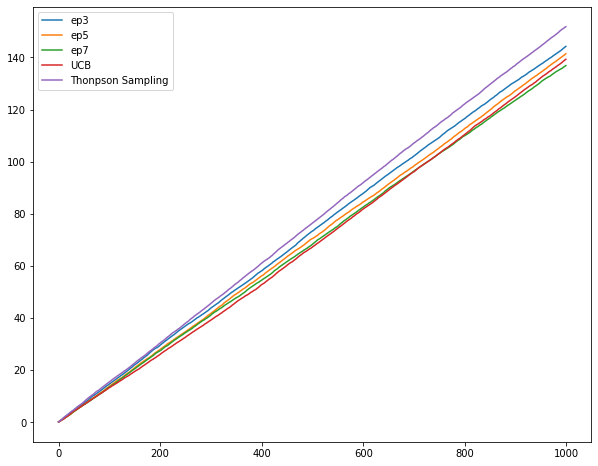

In [35]:
plt.figure(figsize=(10,8))

def cumsum(hist):
    return np.cumsum(np.mean(hist,axis=0))

plt.plot(cumsum(eg_3_reward_hist_hist),label='ep3')
plt.plot(cumsum(eg_5_reward_hist_hist),label='ep5')
plt.plot(cumsum(eg_7_reward_hist_hist),label='ep7')
plt.plot(cumsum(ucb_reward_hist_hist),label='UCB')
plt.plot(cumsum(ts_reward_hist_hist),label='Thonpson Sampling')
plt.legend()

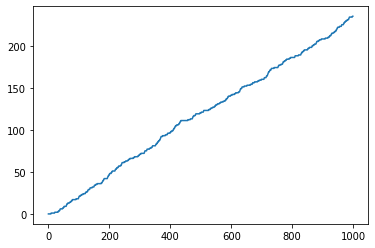

In [41]:
plt.plot(np.cumsum(ts_reward_hist_hist[0]),label='ep3')
